In [8]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import pandas

## estimating onsets in python

In [12]:
def getOnsetsEnv(sig,sr=44100):

    o_env = librosa.onset.onset_strength(y=sig, sr=sr)
    times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
    onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

    D = np.abs(librosa.stft(sig,n_fft=4096))
    plt.figure()
    ax1 = plt.subplot(2, 1, 1)
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), hop_length=512, x_axis='time', y_axis='log')
    plt.title('Estimated from Onset Envelope')
    plt.subplot(2, 1, 2, sharex=ax1)
    plt.plot(times, o_env, label='Onset strength')
    plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
    plt.axis('tight')
    plt.legend(frameon=True, framealpha=0.75)
    
    return onset_frames

In [13]:
def getOnsetsWrapper(filename):
    sig , sr = librosa.load(filename,mono=True,sr=None)
    
    # estimate onsets from an onset envelope
    onset_frames = getOnsetsEnv(sig,sr)
    print('Estimated onsets:')
    print(librosa.frames_to_time(onset_frames, sr=sr))

Estimated onsets:
[0.03482993 0.23219955 0.42956916 0.65015873 0.85913832 1.06811791
 1.28870748 1.4860771  1.70666667 1.91564626 2.12462585 2.34521542
 2.54258503 2.7631746  2.96054422 3.19274376 3.39011338 3.61070295
 3.80807256 4.02866213 4.23764172 4.44662132 4.65560091 4.85297052
 5.09678005 5.29414966 5.50312925 5.72371882 5.92108844 6.141678
 6.3506576  6.55963719]


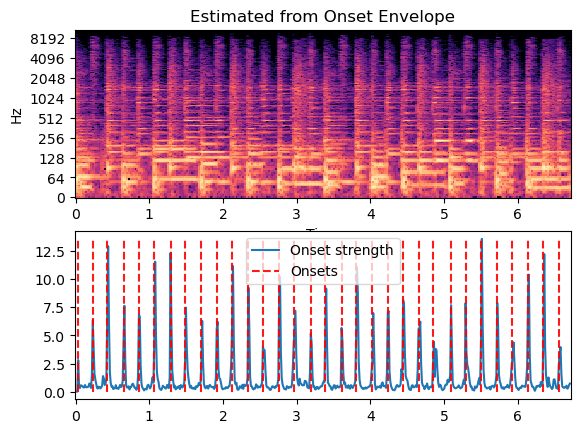

In [14]:
file = 'files/kingsLoop.wav'
getOnsetsWrapper(file)

Estimated onsets:
[ 0.03482993  0.71981859  1.46285714  1.86920635  1.90403628  2.18267574
  2.32199546  2.83283447  2.92571429  2.99537415  3.04181406  3.29723356
  3.40172336  3.50621315  3.58748299  3.70358277  3.7384127   3.77324263
  3.8893424   3.97061224  4.098322    4.44662132  4.55111111  4.89941043
  5.07356009  5.13160998  5.27092971  5.38702948  5.51473923  5.61922902
  5.66566893  5.71210884  5.81659864  5.8862585   6.17650794  6.33904762
  6.52480726  6.61768707  6.81505669  7.00081633  7.19818594  7.32589569
  7.51165533  7.66258503  7.70902494  7.80190476  7.83673469  8.05732426
  8.20825397  8.31274376  8.40562358  8.57977324  8.68426304  8.77714286
  8.88163265  9.05578231  9.22993197  9.61306122 10.00780045 10.27482993
 10.30965986 10.65795918 10.73922902 10.79727891 10.84371882 11.02947846
 11.40099773 11.50548753 11.70285714 11.94666667 12.16725624 12.32979592]


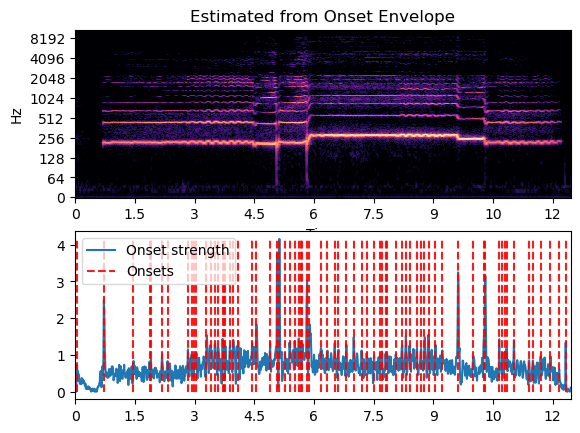

In [15]:
file2 = 'files/avm.wav'
getOnsetsWrapper(file2)

Estimated onsets:
[0.03482993 0.27863946 0.40634921 0.510839   0.6153288  0.74303855
 0.84752834 0.9752381  1.07972789 1.18421769 1.30031746 1.40480726
 1.52090703 1.62539683 1.7414966  1.86920635 2.13623583 2.22911565
 2.33360544 2.44970522 2.56580499 2.67029478 2.78639456 2.87927438
 2.99537415 3.09986395 3.20435374 3.32045351 3.42494331 3.54104308
 3.65714286 3.92417234 4.02866213 4.13315193 4.2492517  4.34213152
 4.45823129 4.57433107 4.67882086 4.79492063 4.89941043 5.00390023
 5.24770975 5.36380952 5.49151927 5.74693878 5.85142857 5.97913832
 6.07201814 6.17650794 6.28099773 6.39709751 6.5015873  6.6060771
 6.72217687 6.80344671 6.93115646 7.04725624 7.17496599 7.30267574]


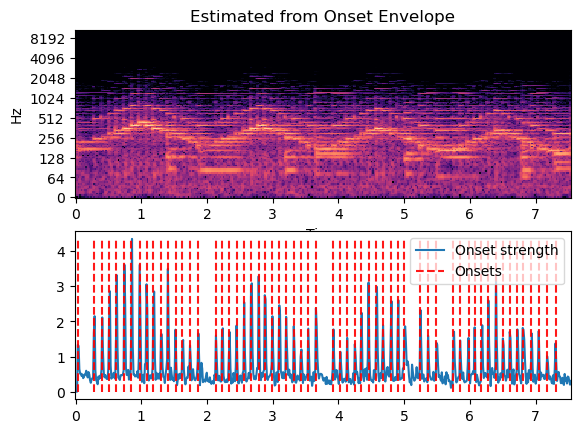

In [16]:
file3 = 'files/mozartSeg.wav'
getOnsetsWrapper(file3)

Estimated onsets:
[0.04643991 0.09287982 0.19736961 0.55727891 0.63854875 0.77786848
 0.91718821 1.10294785 1.21904762 1.32353741 1.49768707 1.67183673
 1.83437642 1.98530612 2.31038549 2.40326531 2.78639456 2.91410431
 3.2275737  3.43655329 3.50621315 3.56426304 3.71519274 3.87773243
 4.15637188 4.2492517  4.5046712  4.58594104]


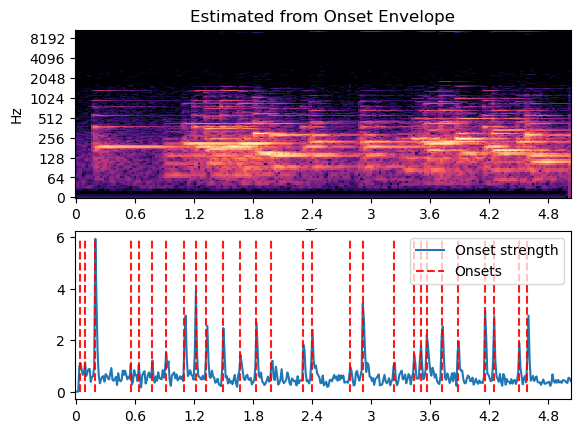

In [18]:
file4 = 'files/chopinSeg.wav'
getOnsetsWrapper(file4)

## import onset estimates from sonic visualiser

In [19]:
def readOnsetCSV(audiofilename,csvfilename):

    df = pandas.read_csv(csvfilename,header=None)
    times=df.loc[:,0]

    sig , sr = librosa.load(audiofilename,mono=True,sr=None)
    D = np.abs(librosa.stft(sig,n_fft=4096))
    plt.figure()
    ax1 = plt.subplot(2, 1, 1)
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), x_axis='time', y_axis='log')
    plt.title('Estimated from Sonic Visualiser')
    plt.subplot(2, 1, 2, sharex=ax1)
    plt.vlines(times, 0, 1, color='r', alpha=0.9, linestyle='--', label='Onsets')
    plt.axis('tight')
    plt.legend(frameon=True, framealpha=0.75)
    
    print('Estimated onsets:')
    print(times.tolist())

Estimated onsets:
[0.220589569, 0.417959184, 0.638548753, 1.056507937, 1.265487528, 1.47446712, 1.695056689, 2.113015873, 2.333605442, 2.751564626, 2.960544218, 3.181133787, 3.390113379, 3.599092971, 3.808072562, 4.017052154, 4.226031746, 4.435011338, 4.632380952, 4.841360544, 5.085170068, 5.282539683, 5.491519274, 5.712108844, 6.130068027, 6.339047619]


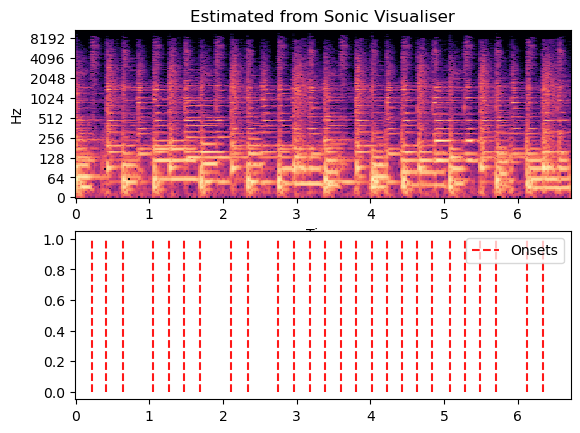

In [22]:
readOnsetCSV('files/kingsLoop.wav','files/kingsLoopOnsets.csv')